# SDSS SQL Tutorial
---

### Names: [Insert names here]

**Before you do anything else, go to File -> Save a Copy in Drive. Make any requested edits to that copy.**

**New Code**

* Simple SQL query.
* Select objects
  * within a given range of RA and Dec.
  * based on object classification.
  * based on redshift.
  * based on numerical constraints (e.g., the color is above a certain value)
* Extract
  * RA, Dec
  * Magnitude at different bands
  * redshift
  * Object ID
* Return a sorted list of object. 
* Join tables. 
* Access the data returned by an SQL query within python.


In the first part of this lab, you were (briefly) introduced to the world of online astronomical databases, and shown how to perform simple searches. The funcionality of these databases extends well beyond what you saw in the previous lab. One of the powerful features of these databases is the ability to select out data that fit a certain set of criteria (beyond simply a location on the sky). This can include e.g., selecting all of the bright, well-resolved, nearby galaxies, in order to make your own Hubble classification diagram. Or selecting out all of the stars within a cluster (based on RA, Dec, and distance) in order to create an HR diagram of the cluster, and hence measure its age.

These complex queries are possible, although not with the simple query tools introduced earlier. To perform these tasks you need to learn about the Structured Query Language (SQL) a programming language for performing queries. To learn SQL, you will work through the SDSS SQL tutorial:
([http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx](http://skyserver.sdss.org/dr14/en/help/howto/search/searchhowtohome.aspx)). 

The tutorial can be completed entirely online, but SQL queries can also be completed within python. This notebook demonstrates how to call SQL queries within python. As you work through the online, record and execute your answers in the notebook below. 

### SQL Queries in Python

The next two cells show how to execute the initial SQL query in the tutorial

In [1]:
!pip install git+http://github.com/astropy/astroquery.git#egg=astroquery

  Cloning http://github.com/astropy/astroquery.git to /private/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/pip-install-nxm7ihjt/astroquery_f0bf713af216405abb736e2b852bea35
  Running command git clone -q http://github.com/astropy/astroquery.git /private/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/pip-install-nxm7ihjt/astroquery_f0bf713af216405abb736e2b852bea35
  xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
ERROR: Could not find a version that satisfies the requirement astroquery (unavailable) (from versions: 0.0.dev1184, 0.0.dev1194, 0.1, 0.2, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.3.dev2794, 0.3.0, 0.3.1, 0.3.2.dev3305, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.3.6, 0.3.6.post2, 0.3.7, 0.3.8, 0.3.9.dev343, 0.3.9.dev390, 0.3.9.dev392, 0.3.9.dev395, 0.3.9.dev411, 0.3.9.dev413, 0.3.9.dev434, 0.3.9.dev436, 0.3.9.dev437, 0.3.9.dev438, 0.3.9.dev450, 0.3.9.dev451, 0.3.9.dev453, 0.3.9.dev

In [2]:
# First, suppress some warnings and import useful packages
import warnings
warnings.filterwarnings('ignore',module='astropy.io.votables.tree')
warnings.filterwarnings('ignore',message='.*unclosed..socket')

import astropy.units as u
from astropy.coordinates import SkyCoord, ICRS
from astroquery.sdss import SDSS #package that allows queries of the SDSS database


Basically, the SQL query is recorded in a string variable, and then this string is sent to SDSS using the `query_sql` function.

In [3]:
# First Query

# input the query as a string, and then submit the streing to SDSS
query_string = '''select ra,dec
from specObj
where ra BETWEEN 140 and 141 AND
dec BETWEEN 20 and 21'''

data = SDSS.query_sql(query_string,verbose=False)

# We can now print the results
print(data)

    ra       dec   
--------- ---------
140.00334 20.774178
140.00636 20.924277
140.01069 20.078161
140.01226 20.538016
140.01318 20.605621
140.01467 20.499697
140.01628 20.849852
      ...       ...
140.97225 20.121144
 140.9787 20.759427
140.97915 20.029572
140.98147 20.817946
140.99308 20.027302
140.99353 20.578518
140.99392 20.423977
Length = 328 rows


The result is an astropy Tables object [(http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table)](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table), which is similar to a dictionary.

In [4]:
# The column names
print(data.keys())

# Access individual columns
print(data['ra'][:5])

['ra', 'dec']
    ra   
---------
140.00334
140.00636
140.01069
140.01226
140.01318


From here you can complete the rest of the tutorial, recording your answers in the cells below. The examples have also been copied here for your records. While tutorial covers a lot of material related to SQL, you only need to go as far as you can before the lab ends (you can save the rest for another time).

**Do I really want them to go as far as they can? Instead do I want them to reach a certain point??**

> **Practice 1:** What objects has the SDSS seen in a smaller area of the sky near ra = 140.5, dec = 20.5 (the same area you searched in the previous query)?
>
> Modify the previous query so it will return ra and dec of objects where the ra is between 140.25 and 140.75 and dec is between 20.25 and 20.75. How many objects did the query return?

In [5]:
# Practice 1
query_string = '''select ra,dec
from specObj
where ra between 140.25 and 140.75 
and dec between 20.25 and 20.75

'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

    ra       dec   
--------- ---------
140.25263 20.610694
140.26132  20.37615
140.26652  20.27486
140.26679 20.410276
140.26998 20.665789
140.29008 20.268252
140.29458 20.557766
      ...       ...
140.72894 20.652857
 140.7291 20.400367
140.73026 20.441962
140.74094 20.320367
140.74187  20.34313
140.74276 20.596196
140.74828 20.343699
Length = 89 rows


> **Practice 2:** Which of the objects you found in Practice 1 are galaxies? Modify your query so that it returns the ra, dec, and the best object ID for galaxies (and only galaxies) whose ra is between 194.25 and 194.75 and whose dec is between 2.25 and 2.75.

In [6]:
# Practice 2
query_string = '''select ra,dec
from specObj
where ra between 140.25 and 140.75 
and dec between 20.25 and 20.75
and class = "galaxy"

'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

    ra       dec   
--------- ---------
140.26652  20.27486
140.26679 20.410276
140.26998 20.665789
140.30213 20.516802
140.31007 20.374799
140.32603 20.627772
140.35157 20.735508
      ...       ...
140.72577 20.342547
140.72754 20.583188
 140.7291 20.400367
140.73026 20.441962
140.74094 20.320367
140.74187  20.34313
140.74828 20.343699
Length = 40 rows


In [7]:
# Sample Query: Logical Operators
query_string = '''select top 10
    z, ra, dec, bestObjID
from
    specObj
where
    class = 'galaxy'
    and z > 0.3
    and zWarning = 0
'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

    z         ra       dec          bestObjID     
--------- --------- ---------- -------------------
0.3000001 184.86409  52.571314 1237657629529211079
0.3000009 222.98982  42.629408 1237658203986460871
0.3000009 146.39863  5.8334459 1237658423547920434
0.3000012 49.459411   0.847754 1237660241924063461
0.3000018 172.28104  10.234226 1237658493349789816
0.3000027 156.25024  7.6586271 1237658425162858683
0.3000027 231.07321  32.718373 1237662341082382595
0.3000033 197.37712  10.524518 1237662238545478566
0.3000035 184.90501 -3.3095095 1237650760782053596
0.3000037 242.52563  6.0693494 1237662198290186255


In [8]:
# Sample Query: Logical Operators
query_string = '''select top 10
    z, ra, dec, bestObjID
from 
    specObj
where
    (class = 'galaxy' or class = 'qso')
    and z > 0.3
    and zWarning = 0
'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

    z         ra       dec          bestObjID     
--------- --------- ---------- -------------------
0.3000001 184.86409  52.571314 1237657629529211079
0.3000009 222.98982  42.629408 1237658203986460871
0.3000009 146.39863  5.8334459 1237658423547920434
0.3000012 49.459411   0.847754 1237660241924063461
0.3000018 172.28104  10.234226 1237658493349789816
0.3000027 156.25024  7.6586271 1237658425162858683
0.3000027 231.07321  32.718373 1237662341082382595
0.3000033 197.37712  10.524518 1237662238545478566
0.3000035 184.90501 -3.3095095 1237650760782053596
0.3000037 242.52563  6.0693494 1237662198290186255


In [9]:
# Sample Query: Logical Operators
query_string = '''select top 10
    ra, dec, modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z, objID
from 
    photoObj
where
    type = 6
    and modelMag_u - modelMag_g < 0.5
'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

       ra              dec        modelMag_u ... modelMag_z        objID       
---------------- ---------------- ---------- ... ---------- -------------------
21.7489625734203 20.8928509871811   24.47644 ...   20.93681 1237679541360656765
21.7146801359507 20.4432857186118    23.4531 ...   20.20991 1237679461900353900
22.3833537049599 20.0086760632325   23.31016 ...   21.33505 1237679504864968995
20.4532228010766 19.4146674875702   23.74691 ...    23.3264 1237679503790441055
20.4575029739604 19.4034512992811   22.09286 ...   21.46572 1237679503790441061
23.8528956918851  17.960344971995   25.89019 ...   23.56271 1237679459216982791
23.8678603354314 18.0722111769438     24.668 ...   23.14229 1237679459216982799
24.1930872176298 19.1999599866118    23.1454 ...   21.21239 1237679460827660758
 23.789412470134 18.2858004580844   24.12651 ...   20.76979 1237679502718141036
23.7877842920117 18.2587365072431   24.26909 ...   21.52649 1237679502718141037



> **Practice 3:** What are the reddest galaxies in the area of the sky near ra=141?
>
> Write a query to search for galaxies between ra = 140.9 and ra = 141.1 brighter than g=18.0 for which u-g>2.2. Retrieve the Object ID, ra, dec, and the five final magnitudes.

In [10]:
# Practice 3
query_string = '''select top 10
  objID, ra, dec, modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z
from photoObj
where
  type = 3 and
  modelMag_g < 18.0 and
  modelMag_u-modelMag_g>2.2

'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

       objID               ra        ... modelMag_i modelMag_z
------------------- ---------------- ... ---------- ----------
1237672132001530905 283.748738272469 ...   15.82844   15.29652
1237667206208422149 80.5427521003942 ...   15.95102   23.03563
1237667206208422152 80.5449438194449 ...   16.73747   19.53274
1237667206208421996 80.4552327793352 ...    12.0804   13.41948
1237667206208422131  80.444725770296 ...   15.65011   15.48841
1237672132001531061 283.867839890997 ...   10.87182   10.48374
1237672132001531103 283.868592770409 ...   15.70019    23.0845
1237654872683905062 154.849474331231 ...   15.18962   15.00237
1237655549668032618 242.972085394935 ...   9.720732   9.675129
1237652938327916898 313.683556336204 ...   15.75685   22.82109


> **Practice 4:** What are the highest-redshift quasars in the SDSS database?
>
> Write a query to search for quasars for which we have obtained spectra (search the specObj table) with redshifts greater than 4.5 and good measurements (zWarning=0). Retrieve each quasar's Photo ID, ra, dec, and redshift.

In [11]:
# Practice 4
query_string = '''select top 10
  ra, dec, z, bestobjID
from specobj
where
  z > 4.5 and
  zWarning = 0 and
  class = 'qso'

'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

    ra        dec        z          bestobjID     
--------- ----------- -------- -------------------
226.87766   55.619792 4.500529 1237655465388999582
166.32833   19.832961  4.50241 1237668290162131387
167.10967  0.61852761 4.502814 1237674650996769779
145.02001   5.4419457 4.503839 1237674460417754011
116.39974   33.178191 4.504273 1237674289681072697
127.76246   52.592732 4.504608 1237651272960836116
 188.6143   29.449435 4.504811 1237667253480325869
34.927581 -0.19360219 4.505384 1237666407920829375
132.93219   23.535822 4.505914 1237665098459382395
 29.34542   2.0443026 4.507283 1237678618504397427


In [12]:
# Sample Query: Joining
query_string = '''select top 100
    x.plate, x.mjd,
    s.fiberID,
    p.modelMag_u, p.modelMag_g, p.ModelMag_r, p.ModelMag_i, p.ModelMag_z,
    p.ra, p.dec,
    s.z, p.ObjID
from photoObj p
join specObJ s on s.bestobjid = p.objid
join plateX x on x.plateID = s.plateID
where
    s.class = 'qso'
    and s.zwarning = 0
    and s.z between 0.3 and 0.4
'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

plate  mjd  fiberID ...        dec             z            ObjID       
----- ----- ------- ... ------------------ --------- -------------------
  266 51630     133 ... -0.790101585801458  0.367843 1237650795146182823
  405 51816     557 ... 0.0939898305717069 0.3838535 1237663784212299796
  435 51882     441 ...   41.7736025629101 0.3626565 1237651191889133881
  399 51817     406 ...  0.935562504737754 0.3810727 1237663785280405653
  266 51630     252 ...   -1.0644603442597 0.3395857 1237650794609115162
  266 51630     161 ... -0.259485341101189 0.3253868 1237650795683184784
  486 51910     587 ...     61.83930260932 0.3947759 1237651272429994188
  ...   ...     ... ...                ...       ...                 ...
  280 51612     592 ...  0.552258176674583 0.3199581 1237674650998734893
  302 51688     124 ...  -1.01737095446737 0.3829785 1237674601605431697
  301 51942     577 ...  0.792616944343723  0.361432 1237648722317672500
  279 51984     604 ...  0.938989963692516 0.370222

> **Practice 5:** How can you look up image data, plates, and spectra of moderately bright galaxies?
>
> Write a query to find 100 galaxies for which we have spectra that have g magnitude between 17 and 17.4 and redshift less than 0.05. For each galaxy retrieve the object ID, the five magnitudes, the redshift, the plate/MJD number, and the fiber number.

In [13]:
# Practice 5
query_string = '''select top 100
  p.objid, p.modelmag_u, p.modelmag_g, p.modelmag_r, p.modelmag_i, p.modelmag_z, 
  s.z, s.fiberid,
  x.plateid
from photoobj p
join specobj s on s.bestobjid = p.objid
join platex x on x.plateid = s.plateid
where
  p.modelmag_g between 17 and 17.4 and
  s.z < 0.05 and
  s.class = 'galaxy'

'''

data = SDSS.query_sql(query_string,verbose=False)
print(data)

       objid        modelmag_u modelmag_g ... fiberid       plateid      
------------------- ---------- ---------- ... ------- -------------------
1237663783677722827   18.80216   17.22076 ...     235  459367192543127552
1237670015127060540   18.74901   17.13847 ...     295 2627850444864514048
1237657587097403535   18.32945   17.27628 ...     411  459367192543127552
1237659161202393400   19.10504   17.29792 ...     457 1188950347998062592
1237663783678181395   18.31826   17.35348 ...     155  459367192543127552
1237663783677591756   19.08607   17.13587 ...     238  459367192543127552
1237658613056798884   18.32199   17.38312 ...     353 1089871150290331648
                ...        ...        ... ...     ...                 ...
1237667429561598021   18.89843   17.03318 ...     188 2637983544395196416
1237663783669727302   18.42834    17.2171 ...     194  449234093314435072
1237658918531301550   19.06465   17.39562 ...     330 1168684148148168704
1237667108501192979   18.46069   17.28

### Putting it all together

We have seen how to collect information from different databases. Now lets put it together.

> **Q:** Let examine the Virgo galaxy cluster, by estimating its total mass based on its velocity dispersion, and look at the colors of the galaxies. To calculate the mass you can use the virial theorem, $M=2Rv^2/G$, where $R$ is the radius of the cluster (assume $R$=7.5 million light years), $G$ is the gravitational constant, and $v$ is the standard deviation of the velocities, which you can derive from the standard deviation of the redshift $z$ ($z=vc$, where $c$ is the speed of light). Also, make a plot of g-i vs i for each of the galaxies within the Virgo cluster.
Query the SDSS database for all galaxies within 5 degrees of the center of the Virgo cluster, with a redshift within 50% of the average value for the Virgo cluster. Think about which values you need to pull out from the database. 

In cgs units, 1 light year = 9.5$\times10^{17}$cm, G = 6.67$\times10^{-8}$ cm$^{3}$/g/s$^2$, c=2.99$\times10^{10}$cm/s, and the mass of the Sun is 1.99$\times10^{33}$ g.

In [33]:
query_string ='''select 
  p.objid, p.modelmag_g, p.modelmag_i,  
  s.z
from photoobj p
join specobj s on s.bestobjid = p.objid
where
  p.ra between 175 and 185 and
  p.dec between 7 and 17 and
  s.class = 'galaxy' and
  s.z between .002 and .006

'''
data = SDSS.query_sql(query_string,verbose=False)
print(data)

       objid        modelmag_g modelmag_i      z     
------------------- ---------- ---------- -----------
1237661069796900926   15.09955   15.56826  0.00244776
1237661070873133125   16.43402   15.80676  0.00257283
1237664289926480101   21.75362   21.31621 0.004304042
1237658492281028625     13.284   12.05649 0.002057852
1237661068722176158   16.26715   15.61423 0.002991138
1237661069261537498   16.32395   16.09218 0.002989913
1237661069796114663   16.38944   15.98313 0.003434411
                ...        ...        ...         ...
1237664289928118309   14.94217    14.0402 0.004219569
1237668494171897992   17.87925   17.41666 0.004067285
1237671127520510247   17.81249   17.39389 0.005434663
1237671128593989759    12.9213    11.8385 0.005509924
1237658491744026761   16.56027   16.08924 0.005976003
1237661950253793438   16.79844   16.10863  0.00582912
1237662525228777577   17.06059   16.59245 0.005894653
Length = 50 rows


Text(0, 0.5, 'g-i')

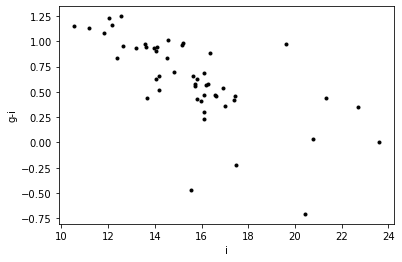

In [34]:
import matplotlib.pyplot as plt
plt.plot(data['modelmag_i'],data['modelmag_g']-data['modelmag_i'],'.k')
plt.xlabel('i')
plt.ylabel('g-i')

In [35]:
import numpy as np
mass = 2*7.5e6*9.461e17*(np.std(data['z']*2.99e10)**2)/6.67e-8/1.99e33
print(mass/1e15)

0.13625519457347385
356.9865374951765



### To turn in this lab, share the lab with me using the *Share* button in the upper right.
